# IEUK - LLOYDS Banking Group | Sector Skills Project

##  PASTE DIRECTORY TO THE DATA

In [305]:
log_path = r'\sample-log.log' 
with open(log_path, 'r') as file:
    logs = file.readlines()

FileNotFoundError: [Errno 2] No such file or directory: '\\sample-log.log'

## Imports

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataparsing using RegEx

In [306]:
pattern = re.compile(
    r'(?P<ip>\S+) - (?P<country>\S+) - \[(?P<datetime>.*?)\] "(?P<method>\S+) (?P<endpoint>\S+) HTTP/\d.\d" (?P<status>\d{3}) (?P<size>\d+) "-" "(?P<user_agent>.*?)" (?P<latency>\d+)'
)

entries = []
for line in logs:
    match = pattern.match(line)
    if match:
        entry = match.groupdict()
        # Convert datetime
        entries.append(entry)

# Convert to DataFrame
df = pd.DataFrame(entries)

## Data Processing for convenience

In [307]:
df["status"] = pd.to_numeric(df["status"])
df["size"] = pd.to_numeric(df["size"])
df["latency"] = pd.to_numeric(df["latency"])
df["datetime"] = pd.to_datetime(df["datetime"], format="%d/%m/%Y:%H:%M:%S").dt.strftime("%d/%m/%Y/%H")
df.head()

,ip,country,datetime,method,endpoint,status,size,user_agent,latency
0,100.34.17.233,NO,01/07/2025/06,GET,/news/grammy-nominations-2024,302,1234,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,269
1,173.80.18.254,NO,01/07/2025/06,POST,/,200,1234,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,124
2,10.3.0.48,SE,01/07/2025/06,GET,/podcasts/behind-the-beat,200,1234,Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like...,284
3,172.56.143.33,US,01/07/2025/06,GET,/terms-of-service,200,1234,Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like...,262
4,208.54.157.184,NO,01/07/2025/06,POST,/privacy-policy,200,1234,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,118


In [308]:
#EDA:
df["ip"].value_counts()[:25]

ip
45.133.1.2         5400
45.133.1.1         5400
35.185.0.156       3600
194.168.1.2        1859
194.168.1.6        1855
194.168.1.8        1831
194.168.1.3        1798
194.168.1.1        1789
194.168.1.7        1767
194.168.1.4        1763
194.168.1.5        1738
185.220.100.77     1440
185.220.101.86     1440
185.220.102.135    1440
185.220.101.19     1440
185.220.101.78     1440
172.25.2.223         47
192.168.45.153       46
192.168.21.180       42
192.168.26.218       42
172.27.2.90          42
192.168.3.22         41
192.168.43.58        41
192.168.5.26         40
10.3.0.73            40
Name: count, dtype: int64

In [ ]:
subset = df["ip"].value_counts()[:16] # Subset of significantly frequent ips

In [310]:
subset

ip
45.133.1.2         5400
45.133.1.1         5400
35.185.0.156       3600
194.168.1.2        1859
194.168.1.6        1855
194.168.1.8        1831
194.168.1.3        1798
194.168.1.1        1789
194.168.1.7        1767
194.168.1.4        1763
194.168.1.5        1738
185.220.100.77     1440
185.220.101.86     1440
185.220.102.135    1440
185.220.101.19     1440
185.220.101.78     1440
Name: count, dtype: int64

## Plot 1: Overall request count for each IP

C:\Users\garba\AppData\Local\Temp\ipykernel_35796\4132618425.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subset.values, y=subset.index, palette="mako")


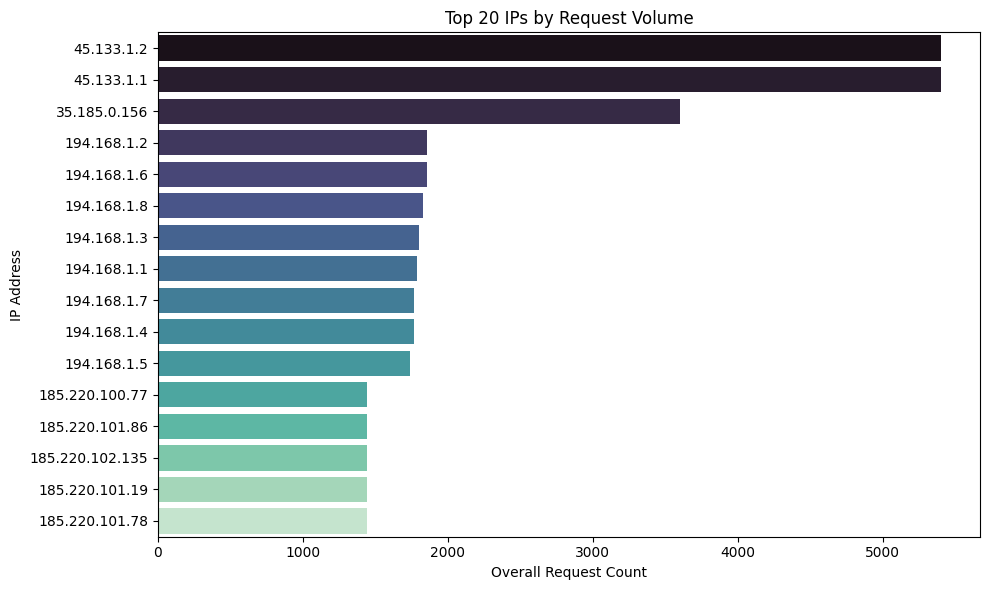

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=subset.values, y=subset.index, palette="mako")
plt.title('Top IPs by Request Volume')
plt.xlabel('Overall Request Count')
plt.ylabel('IP Address')
plt.tight_layout()
plt.show()

In [311]:
df = df[df["ip"].isin(subset.index)]

## Plot 2: Operations executed over time by each IP

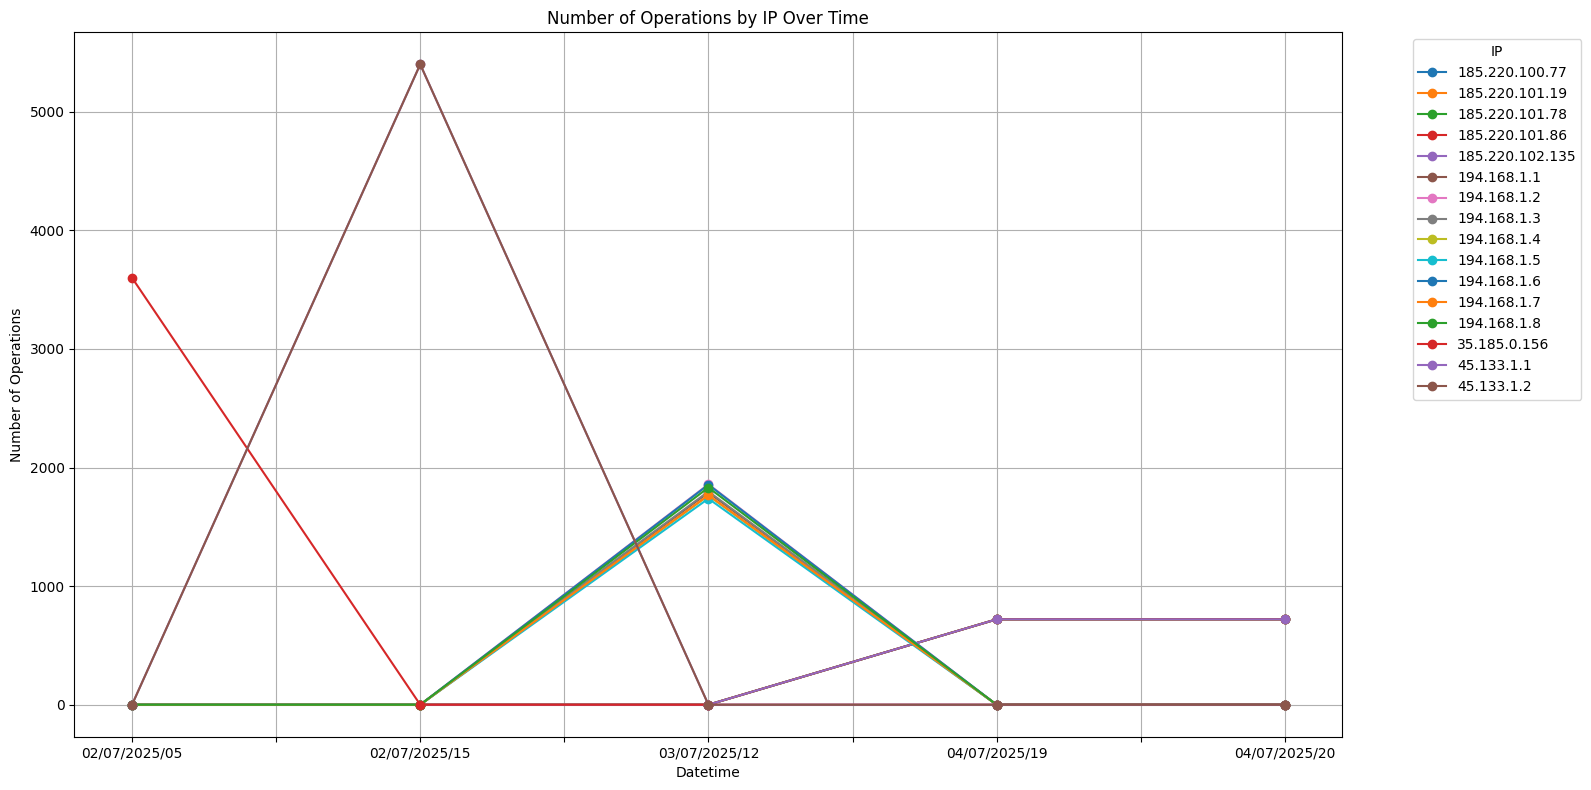

In [312]:
operation_counts = df.groupby(['datetime', 'ip']).size().reset_index(name='count')

# Step 3: Pivot for plotting (IP as column, datetime as index)
pivot_df = operation_counts.pivot(index='datetime', columns='ip', values='count').fillna(0)

# Step 4: Plot
plt.figure(figsize=(16, 8))
pivot_df.plot(ax=plt.gca(), legend=True, marker='o')

plt.title('Number of Operations by IP Over Time')
plt.xlabel('Datetime')
plt.ylabel('Number of Operations')
plt.grid(True)
plt.legend(title='IP', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
freq_counts = df.groupby(['datetime', 'ip']).size().reset_index(name='count_freq') # Hourly amount of operations 
df = df.merge(freq_counts, on=["datetime","ip"]).drop_duplicates() # Adding frequencies to the main Data Frame and removing duplicates

## Plot 3: Hourly request frequency by IP

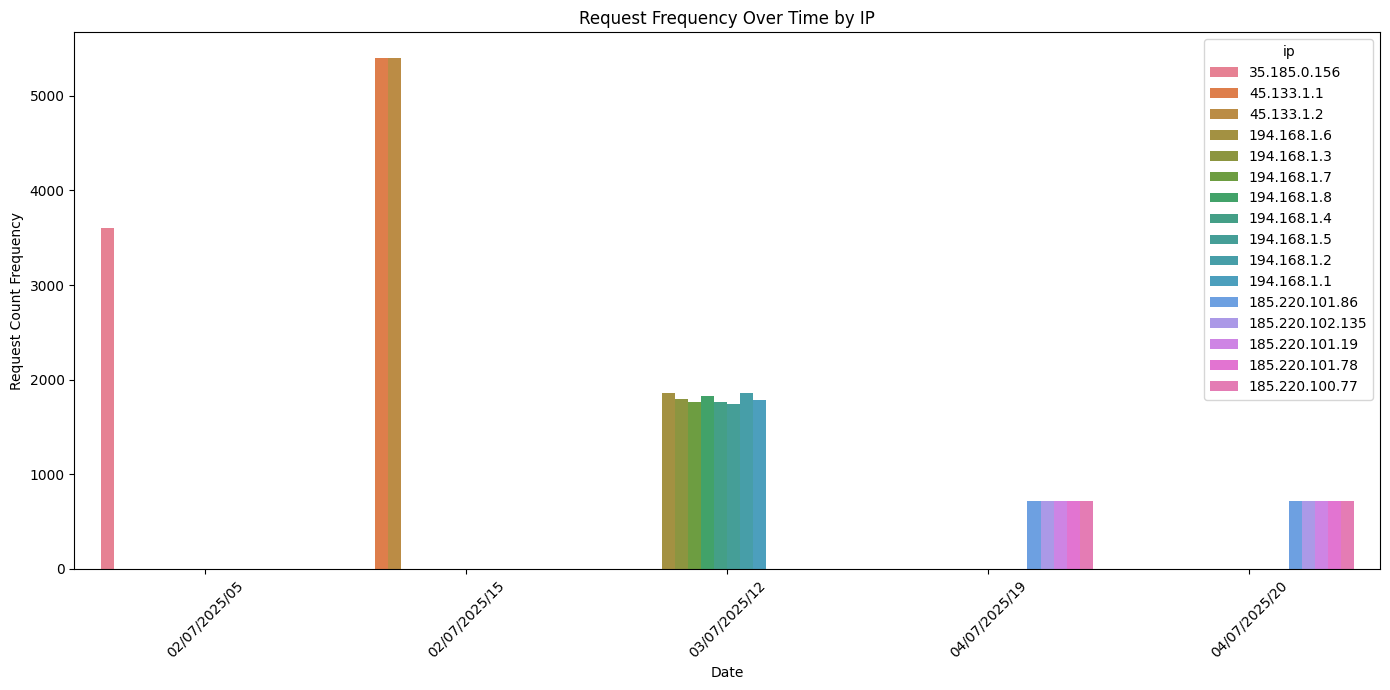

In [294]:
plt.figure(figsize=(14, 7))
sns.barplot(data=df, x='datetime', y='count_freq', hue='ip')
plt.title('Request Frequency Over Time by IP')
plt.xlabel('Date')
plt.ylabel('Request Count Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Important observations:

In [300]:
df["user_agent"].value_counts()

user_agent
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36                              5377
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Version/17.2.1 Safari/537.36                          3516
Wget/1.20.3 (linux-gnu)                                                                                                                      3321
curl/7.68.0                                                                                                                                  2172
HTTPie/3.2.0                                                                                                                                 2075
python-requests/2.28.1                                                                                                                       2069
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36 E

In [301]:
df["status"].value_counts()

status
200    14698
404     7823
401     5338
429     1816
500     1468
504     1459
503     1426
403     1176
423      427
Name: count, dtype: int64

In [303]:
df["country"].value_counts()

country
UK    14313
RU    12626
US     3321
CN     1809
KP     1788
IR     1774
Name: count, dtype: int64